# matplotlib

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


For all plots, make sure that you use labels with units as appropriate, and make good choices about all of the plot characteristics like fontsize, colors, and markersize. Choose colormaps that are appropriate for your data; that is, sequential for sequential data or diverging for diverging data. Don't use the jet (rainbow) colormap! (As of Matplotlib 2.0, this is no longer the default, so this should be easier.) I'll be grading your plots with clarity and design in mind.

There are no functions set up for you in this assignment. You can write functions to use in your code if you want, or not — it is up to you. I'll be manually grading these questions by inspection, so there are no tests for you to run.

Don't use `pandas` for this assignment.

### 1. Plot a sin wave

Plot the function sin($4 \pi x$) from x = 0 to 20. Label the graph, where the x-axis is time, and the y-axis is amplitude.

---

Grading rubric [4 points]:

* [2 pts] Plotted data is correct over the right range
* [2 pts] Asthetics: Colors, resolution of line, labels, etc.


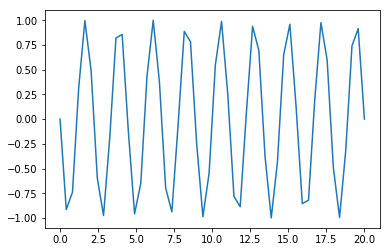

In [179]:
# YOUR CODE HERE
import math

x = np.linspace(0, 20)
y = np.sin(4*math.pi*x)
plt.plot(x, y)

### 2. Plot a function and the mean

Plot the fourth power of the same function as in problem, [sin($2 \pi x$)]$^4$, over the same range, x = 0 to 20. Plot the mean of this function over the range using a distinct line style. Lable the axes and lines.

---

Grading rubric [4 points]:

* [2 pts] Plotted data is correct
* [2 pts] Asthetics: readability, colors, labels, etc.

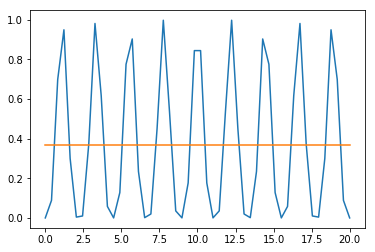

In [180]:
# YOUR CODE HERE
import math

x = np.linspace(0, 20)
y = np.sin(2*math.pi*x)**4

ym=np.zeros(len(x))
ym[:]=np.mean(y)
plt.plot(x, y)
plt.plot(x, ym)

###  3. Plot a fractal

Here is some code to generate the julia fractal:

    def julia(x, y, c, zabs_max=10, nit_max = 1000):  
        res = np.zeros((len(y), len(x)))
        for i, ix in enumerate(x):
            for j, iy in enumerate(y):
                z = complex(ix, iy)
                nit = 0
                while abs(z) <= zabs_max and nit < nit_max:
                    z = z**2 + c
                    nit += 1

                res[i,j] = nit / nit_max

        return res

    c = complex(-0.1, 0.65)

    x = np.linspace(-1.5, 1.5, 501)
    y = np.linspace(-1.5, 1.5, 501)

    j = julia(x, y, c)

Change the parameter c, and make a plot of this fractal, defined by the value given in the array `j`, using `pcolormesh`. For your final figure you may want to increase the resolution of the figure, by increasing the number of `x` and `y` points. 

See [this paper](https://www.researchgate.net/profile/Christian_Bauckhage/publication/272679245_NumPy_SciPy_Recipes_for_Image_Processing_Creating_Fractal_Images/links/54eb530e0cf2a0305193b9eb.pdf) for some more information on this.

---

Grading rubric [6 points]:

* [3 pts] Plotted values are reasonable and well represented in the figure
* [3 pts] Overall asthetics of the figure (aspect, labels, etc)

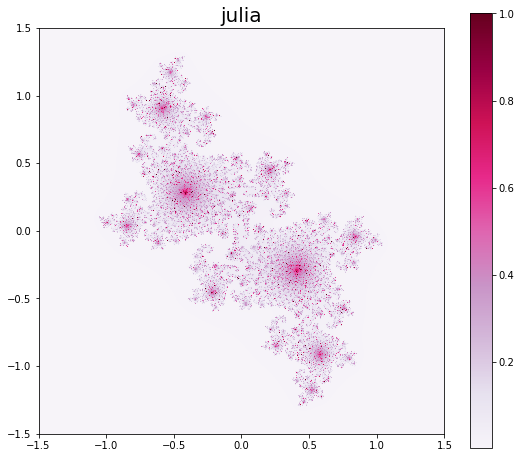

In [181]:
# YOUR CODE HERE
import matplotlib.cm as cm
def julia(x, y, c, zabs_max=10, nit_max = 1000):  
    res = np.zeros((len(y), len(x)))
    for i, ix in enumerate(x):
        for j, iy in enumerate(y):
            z = complex(ix, iy)
            nit = 0
            while abs(z) <= zabs_max and nit < nit_max:
                z = z**2 + c
                nit += 1

            res[i,j] = nit / nit_max

    return res

c = complex(-0.2, 0.65)

x = np.linspace(-1.5, 1.5, 1001)
y = np.linspace(-1.5, 1.5, 1001)

j = julia(x, y, c)

Zmax = abs(j).max()
Zmin = abs(j).min()
Xp1, Yp1 = np.meshgrid(x, y)
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121,aspect=1)
mappable=ax.pcolormesh(Xp1, Yp1, j, cmap=cm.PuRd, vmin=Zmin, vmax=Zmax)
ax.axis([Xp1.min(), Xp1.max(), Yp1.min(), Yp1.max()])
ax.set_title('julia', fontsize=20)
plt.colorbar(mappable)


### 4. Histogram

Make a 1D histogram plot of wind speed from the BURL1 NOAA weather station. We can load the data directly from the internet, like this:

    burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')

and access the wind speed from this array with:

    wind_speed = burl[:, 6].

---

Grading rubric [4 points]:

* [2 pt] Use histogram correctly
* [2 pt] Overall aesthetics

(8755,)


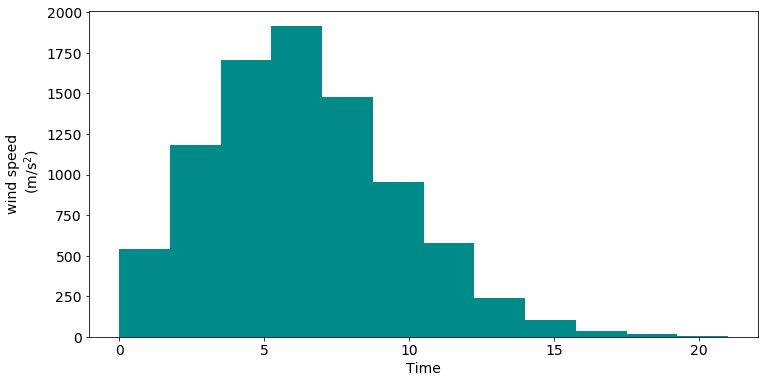

In [182]:
# YOUR CODE HERE
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]
month_length=[31,28,31,30,31,30,31,31,30,31,30,31]
# ws_in_month=


fig = plt.figure(figsize=(12,6))  # 20,6 is the y and x markers number, so 20 should be as bins number
ax = fig.add_subplot(1, 1, 1)
ax.hist(wind_speed, bins=12, color='darkcyan', lw=0.1)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('wind speed\n (m/s$^2$)', fontsize=14)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
ax.set_title('', fontsize=14)
 
print(np.shape(wind_speed))


### 5. Line Plotting

Reproduce this image, showing river flow during flood years of the Merrimack River

![Merrimack River Discharge](merrimack_discharge.png)

The data used to create this plot can be found in the current directory and is called `merrimack_discharge.dat`. You may read in the data any way you want. That is, you may extract the data for the years in question by hand, however part of your grade will be based on creating a flexible script that could read in values from another datafile, e.g., from another river gauge. Pay attention to detail.

Recreate the setup of the plot as carefully as possible, including the four lines representing river flow in the four specific years (1936, 1938, 1960, 1987).

Also add the black line representing the mean discharge (calculated from the data in the file; the mean is over all of the years), and the shaded region representing one standard deviation from the mean.

---

Grading rubric [8 points]:

* _All points based on visual inspection of the figure_
* [2 pts] Four (correct) lines exist, one for each of the years, linestyles/colors match
* [2 pts] Labels are placed correctly for lines, and axes are displayed correctly
* [2 pts] Minor ticks, offset month names, and grid lines
* [2 pts] Grey fill with black line for mean exists (and looks correct)

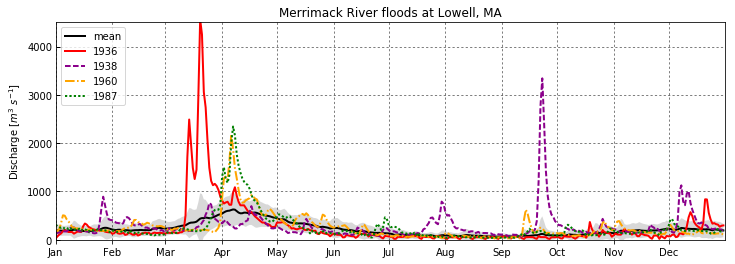

In [478]:
import matplotlib.dates
from datetime import datetime
import warnings
f = open('./merrimack_discharge.dat')
f.seek(0)  
gps = {}  # initialize dictionary

chosenyear=[1936, 1938, 1960, 1987]
daysn = np.arange(1,366,1)

for yeari in chosenyear:
    gps[str(yeari)] = []
for daysi in daysn:
    gps[daysi] = []
    
gps['mean'] = []  
gps['datetimes0'] = []
gps['datetimes'] = []
gps['discharge'] = []
gps['date'] = []
gps['discharge_mean'] = []
gps['discharge_std'] = []
array_discharge  = []

monthn=[1,2,3,4,5,6,7,8,9,10,11,12]
dayn=[31,28,31,30,31,30,31,31,30,31,30,31]

for line in f.readlines():
    data = line.split()
    if data[0] == 'USGS' :
        date = data[2].split('-')
        year = int(date[0])
        month = int(date[1])
        day = int(date[2])
        discharge = float(data[3])*(0.3048**3)
  
        
        if month == 2 and day == 29:    # for the 366 days year, just delete the 29th day of the Feb
            continue
        else:
            gps['discharge'].append(float(discharge))
            gps['date'].append(datetime(year, month, day))              
            
        for yeari in chosenyear:
            if year == yeari:
                if month == 2 and day == 29:    # for the 366 days year, just delete the 29th day of the Feb
                    continue
                else: 
                    gps[str(year)].append(discharge)
                    gps['datetimes0'].append(datetime(year, month, day))

                    
            
mm = np.array([dd.month for dd in gps['date']])
da = np.array([dd.day for dd in gps['date']])
   

for imo in monthn :
    for ida in np.linspace(1,dayn[imo-1],dayn[imo-1]):
        array_discharge = np.array(gps['discharge'])[(mm == int(imo)) & (da == int(ida))]
#         with warnings.catch_warnings():
#             warnings.simplefilter("ignore", category=RuntimeWarning)
#             array_discharge = np.nanmean(array_discharge)
        gps['discharge_mean'].append(array_discharge.mean())
        gps['discharge_std'].append(array_discharge.std())
        
gps['datetimes']=np.reshape(gps['datetimes0'],(4,365))[0]


fig = plt.figure(figsize=(12,4))  # 20,6 is the y and x markers number, so 20 should be as bins number
ax = fig.add_subplot(1, 1, 1)

plt.yticks([0, 1000, 2000, 3000, 4000])
ax.set_ylim(0, 4500)
ax.get_yaxis().set_tick_params(direction='in',width=1)

da2 = np.array([dd.day for dd in gps['datetimes']])
array_disc = gps['datetimes'][da2 == 1]
# ax.set_xlim(array_disc[0].toordinal(),datetime(1937,1,1).toordinal())
ax.set_xlim(array_disc[0],datetime(1937,1,1))
plt.xticks(array_disc)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.xticks(np.linspace(array_disc[0].toordinal(),datetime(1937,1,1).toordinal(),365))
ax.set_title('Merrimack River floods at Lowell, MA')
ax.set_ylabel('Discharge [$m^3$'+' '+'$s^{-1}$]')

ax.plot(gps['datetimes'],gps['discharge_mean'],linestyle=  '-', color='black', label='mean', linewidth=2)
ax.plot(gps['datetimes'],gps['1936'],linestyle= '-', color='red', label='1936', linewidth=2)
ax.plot(gps['datetimes'],gps['1938'],linestyle= '--', color='darkmagenta', label='1938', linewidth=2)
ax.plot(gps['datetimes'],gps['1960'],linestyle= '-.', color='orange', label='1960', linewidth=2)
ax.plot(gps['datetimes'],gps['1987'],linestyle= 'dotted', color='green', label='1987', linewidth=2)
ax.fill_between(gps['datetimes'],np.array(gps['discharge_mean'])+np.array(gps['discharge_std']),np.array(gps['discharge_mean'])-np.array(gps['discharge_std']),facecolor='grey',alpha=0.3)


ax.legend(loc='upper left') 
ax.grid(True, color='k', linestyle=':', linewidth=0.5)

da3 = np.array([dd.day for dd in gps['datetimes']])
#da3


In [ ]:
### 6. Fit a line and plot

Load in the long-term Mauna Loa carbon dioxide dataset:

    mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')

to access the CO$_2$ data (use the interpolated column since the data gaps are filled). Make two figures based on this data:

##### Figure 1
Fit a 1st (straight line), 2nd, and 5th order polynomial to the data, 
then plot the polynomial fits along with the original data to compare.
The fits should be shown only in the range of the data.

###### Figure 2
Also, use your polynomial fits to predict CO$_2$ in the year 2100.
Show your predictions by making another plot and 
showing the three polynomials extended out to 2100. 
Then print the function values at 2100.

---

Grading rubric [6 points]:

* [3 pts] Plotted data that is labeled and looks like reasonable fits.
* [3 pts] Get proper values for the prediction and show in plot.

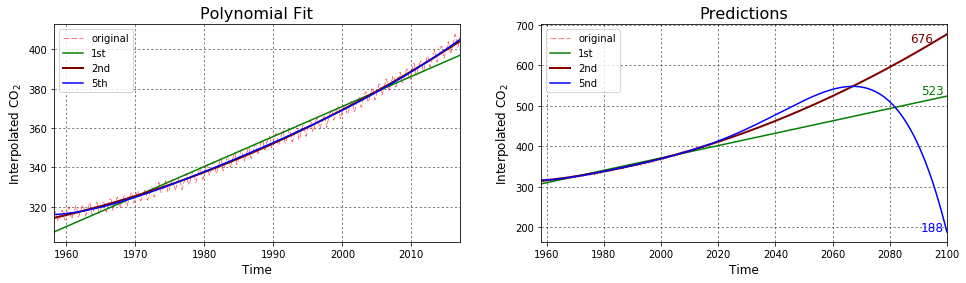

In [522]:
# YOUR CODE HERE
from datetime import datetime, date, timedelta

mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', comments='#')
x=mauna_loa_co2[:,2]
y=mauna_loa_co2[:,4]
p1=np.polyfit(x,y,1)
p2=np.polyfit(x,y,2)
p5=np.polyfit(x,y,5)
p12=np.poly1d(p1)
p22=np.poly1d(p2)
p52=np.poly1d(p5)

fig = plt.figure(figsize=(16,4))  # 20,6 is the y and x markers number, so 20 should be as bins number
ax = fig.add_subplot(1, 2, 1)
ax.plot(x,y,'r--',label='original', linewidth=0.5)
ax.plot(x, p12(x), 'g-', label='1st')
ax.plot(x, p22(x), '-',color='maroon', label='2nd', linewidth=2)
ax.plot(x, p52(x), 'b-', label='5th')
# plt.set_title()

ax.set_xlim(x[0],x[-1])
ax.set_title('Polynomial Fit',fontsize=16)
ax.set_xlabel('Time',fontsize=12)
ax.set_ylabel('Interpolated CO$_2$',fontsize=12)
ax.legend(loc='upper left') 
ax.grid(True, color='k', linestyle=':', linewidth=0.5)

xnum=(2100-1958)*12
x3=np.linspace(1958,2100,xnum)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x,y,'r--',label='original', linewidth=0.5)
ax.plot(x3, p12(x3), 'g-', label='1st')
ax.plot(x3, p22(x3), '-',color='maroon', label='2nd', linewidth=2)
ax.plot(x3, p52(x3), 'b-', label='5nd')
# plt.set_title()

ax.set_xlim(x3[0],x3[-1])
ax.set_title('Predictions',fontsize=16)
ax.set_xlabel('Time',fontsize=12)
ax.set_ylabel('Interpolated CO$_2$',fontsize=12)
ax.legend(loc='upper left') 
ax.grid(True, color='k', linestyle=':', linewidth=0.5)

ax.text(2095,650,str(int(p22(x3[-1]))), horizontalalignment='right',
        verticalalignment='bottom',color='maroon',
        fontsize=12)
ax.text(2095,520,str(int(p12(x3[-1]))), horizontalalignment='center',
        verticalalignment='bottom',color='green',
        fontsize=12)
ax.text(2095,200,str(int(p52(x3[-1]))), horizontalalignment='center',
        verticalalignment='center',color='blue',
        fontsize=12)